# Data Augmentation

## Objectives

* Augment the ASL dataset
* Use the augmented data to train an improved model
* Save the well-trained model to disk for use in deployment

## Preparing the Data

In [ ]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("/content/sign_mnist_train.csv")
valid_df = pd.read_csv("/content/sign_mnist_test.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

## Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

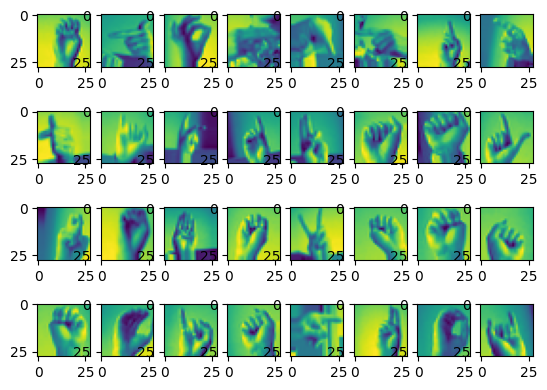

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

## Fitting the Data to the Generator

In [ ]:
datagen.fit(x_train)

## Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training with Augmentation

In [ ]:
model.fit(
    img_iter,
    epochs=20,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=(x_valid, y_valid)
)


Epoch 1/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.1400 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 2/20
  1/518 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - loss: nan

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 3/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0403 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 4/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 5/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0402 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 6/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0312 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 7/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0427 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 8/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0312 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 9/20
518/518 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0446 - loss: nan - val_accuracy: 0.0463 - val_loss: nan
Epoch 10/20
518/518 ━━

## Saving the Model

In [ ]:
model.save('asl_model.keras')